In [1]:
from pathlib import Path

import numpy as np
import pandas as pd



from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt
from dmba import regressionSummary


import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.neural_network import MLPClassifier, MLPRegressor 


%matplotlib inline
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [12]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

from math import sqrt
from dmba import regressionSummary

import matplotlib.pylab as plt
%matplotlib inline


In [3]:
df = pd.read_excel("property_data_group3_excel.xlsx")
print('dimensions of dataframe:',df.shape)

dimensions of dataframe: (688, 14)


In [4]:
df.columns

Index(['Index', 'Address', 'Area', 'Beds', 'Bath', 'Size_sqft', 'Lot_Size',
       'Agent_Name ', 'Agent_Company', 'Price', 'Unnamed: 10', 'Transit_Score',
       'Bike_Score', 'Unnamed: 13'],
      dtype='object')

In [5]:
#Creating a subset dataframe with 12 columns and top
#688 records for regression analysis

#using pd.concat() function to combine non-consecutive columns
#into a new data frame , with top 300 records
#The axis argument specifies the dimension along which
#the concatenation happens, 0=rows, 1=columns.

Total_df_reg = pd.concat([df.iloc[0:300,2:4],
                          df.iloc[0:300,6:10],
                          df.iloc[0:300,11:14],
                          df.iloc[0:300,16:18]],axis=1)
#Show the first 10 records of regression analysis
Total_df_reg.head(10)

,Area,Beds,Lot_Size,Agent_Name,Agent_Company,Price,Transit_Score,Bike_Score,Unnamed: 13
0,Fremont,5,0.62 ac,Lowell King,REALTY EXPERTS,4200000,29,14,4200000
1,Fremont,4,0.25 ac,Tim S. Wang,Legacy Real Estate & Assoc.,1399800,38,58,1399800
2,Fremont,2,0.218 ac,Peter Loh,RE/MAX Galaxy,950000,47,60,950000
3,Fremont,4,0.04 ac,Faridoon Lodin,Alliance Bay Realty,2049888,33,53,2049888
4,Fremont,4,0.04 ac,Faridoon Lodin,Alliance Bay Realty,2049888,33,53,2049888
5,Fremont,3,0.15 ac,Jill Denton,"eXp Realty of California, Inc",1449000,58,73,1449000
6,Fremont,5,0.19 ac,Kim Ott,Compass,2988888,33,33,2988888
7,Fremont,2,0.03 ac,Zeke Mujaddadi,Home Advantage Corp,599888,37,54,599888
8,Fremont,2,2.84 ac,Sanjiv Nayyar,Redfin,649000,42,60,649000
9,Fremont,3,0,Dzovig Derounian,KW Advisors,1198000,60,77,1198000


In [6]:
Total_df_reg.columns

Index(['Area', 'Beds', 'Lot_Size', 'Agent_Name ', 'Agent_Company', 'Price',
       'Transit_Score', 'Bike_Score', 'Unnamed: 13'],
      dtype='object')

In [7]:
#Devlop k-NN model and make predictions
#Identify predictors and outcome of k-NN regressor model
predictors=['Beds','Bath','Price']
outcome='Area'

#Identify x and y variables for k-NN regressor and partition data
#using 60%(0.6) of records for training and 40% for validation
#(test_size=0.4)

In [8]:
# Create data frame Riding Mowers data set. 
property_df = pd.read_excel('property_data_group3_excel.xlsx')

# Add column to data frame with the record number starting 
# from 1 to 686.
property_df['Number'] = property_df.index + 1

# Display the data set. 
property_df

,Index,Address,Area,Beds,Bath,Size_sqft,Lot_Size,Agent_Name,Agent_Company,Price,Unnamed: 10,Transit_Score,Bike_Score,Unnamed: 13,Number
0,0,"45630 Montclaire Ter, Fremont, Alameda County,...",Fremont,5,5.0,4962,0.62 ac,Lowell King,REALTY EXPERTS,4200000,USD,29,14,4200000,1
1,1,"4376 Hyde Cmn, Fremont, Alameda County, CA, 94538",Fremont,4,4.0,1737,0.25 ac,Tim S. Wang,Legacy Real Estate & Assoc.,1399800,USD,38,58,1399800,2
2,2,"45009 Challenge Common 200, Fremont, Alameda C...",Fremont,2,2.0,1279,0.218 ac,Peter Loh,RE/MAX Galaxy,950000,USD,47,60,950000,3
3,3,"43154 Calle Familia, Fremont, Alameda County, ...",Fremont,4,4.0,2374,0.04 ac,Faridoon Lodin,Alliance Bay Realty,2049888,USD,33,53,2049888,4
4,4,"43150 Calle Familia, Fremont, Alameda County, ...",Fremont,4,4.0,2327,0.04 ac,Faridoon Lodin,Alliance Bay Realty,2049888,USD,33,53,2049888,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,"190 Opal AVE, Redwood City, San Mateo County, ...",Redwood City,3,3.0,2055,0.165 ac,Timothy Foy,Midtown Realty,2850000,USD,0,66,2850000,684
684,684,"125 Ridge RD, Redwood City, San Mateo County, ...",Redwood City,3,2.0,1550,0.339 ac,Liam Brennan,Compass,1495000,USD,0,19,1495000,685
685,685,"3765 Farm Hill BLVD, Redwood City, San Mateo C...",Redwood City,4,4.0,3143,0.3 ac,Dawn Thomas,Compass,3500000,USD,0,27,3500000,686
686,686,"35 Arch St, Redwood City, San Mateo County, CA...",Redwood City,7,5.0,3899,0.15 ac,Jonathan Minerick,HOMECOIN.COM,3598000,USD,0,85,3598000,687


In [61]:
# Define new record and its data for Income and Lot-Size.
# Display the new record.
New_df = pd.read_excel("NewPropertyData.xlsx")
newproperty = pd.DataFrame(New_df)
print('New Record Data')
newproperty

New Record Data


,Beds,Bath,Price
0,1,1.0,100000
1,2,1.0,100000
2,3,1.0,100000
3,4,1.0,100000
4,5,1.0,100000
...,...,...,...
285,5,4.0,1000000
286,4,4.5,1000000
287,5,4.5,1000000
288,5,5.0,1000000


In [62]:
# Develop training and validation partitions, 60% (0.6)for 
# training parition data and 40% (0.4) for validation data. 
trainData, validData = train_test_split(property_df, test_size=0.4, random_state=26)

#Display training partition shape (number of records, number of columns)
print('Number of Records and Columns in Training and Validation Partitions')
print(trainData.shape, validData.shape)

# Display training and validation partition records. 
print()
print('Training Partition Records')
print(trainData)
print()
print('Validation Partition Records')
print(validData)

Number of Records and Columns in Training and Validation Partitions
(412, 15) (276, 15)

Training Partition Records
     Index                                            Address          Area  \
297    297  3039 HALCYON COURT, Berkeley, Alameda County, ...      Berkeley   
128    128  3753 Caravella DR, San Jose, Santa Clara Count...      San Jose   
508    508  7686 Arbor Creek Cir, Dublin, Alameda County, ...        Dublin   
585    585  1060 Duane CT, Sunnyvale, Santa Clara County, ...     Sunnyvale   
678    678  619 Hampshire AVE, Redwood City, San Mateo Cou...  Redwood City   
..     ...                                                ...           ...   
160    160  570 Mill Pond Dr, San Jose, Santa Clara County...      San Jose   
77      77  36373 Fremont BLVD, Fremont, Alameda County, C...       Fremont   
102    102  4129 Donald Drive , Palo Alto, Santa Clara Cou...     Palo Alto   
432    432  30021 Mountain View DR, Hayward, Alameda Count...       Hayward   
318    318  352

In [63]:
# Develop standardized (normalized) data for the entire data set. 
scaler = StandardScaler()

# Note the use of an array of column names.
scaler.fit(property_df[['Beds', 'Bath', 'Price']])  

# Transform the full data set into standardized (normalized) data set. 
PropertyNorm = pd.concat([pd.DataFrame(scaler.transform(property_df[['Beds', 'Bath', 'Price']]), 
                                    columns=['zBeds', 'zBath', 'zPrice']),
                       property_df[['Area', 'Number']]], axis=1)
print('Standardized (Normalized) Values of Property Data Set')
print()
print(PropertyNorm)

Standardized (Normalized) Values of Property Data Set

        zBeds     zBath    zPrice          Area  Number
0    1.346557  2.050461  1.557359       Fremont       1
1    0.539561  1.143247 -0.177681       Fremont       2
2   -1.074431 -0.671180 -0.456383       Fremont       3
3    0.539561  1.143247  0.225122       Fremont       4
4    0.539561  1.143247  0.225122       Fremont       5
..        ...       ...       ...           ...     ...
683 -0.267435  0.236034  0.720881  Redwood City     684
684 -0.267435 -0.671180 -0.118694  Redwood City     685
685  0.539561  1.143247  1.123630  Redwood City     686
686  2.960550  2.050461  1.184352  Redwood City     687
687  0.539561  0.236034  1.740144  Redwood City     688

[688 rows x 5 columns]


In [64]:
# Develop standardized (normalized) data in training and validation
# partitions. 
trainNorm = PropertyNorm.iloc[trainData.index]
validNorm = PropertyNorm.iloc[validData.index]

# Display normalized records in training partition.
print('Standardized (Normalized) Values of Training Data Parition')
print()
print(trainNorm)

# Develop and print standardized (normalized) data for new record.
newPropertyNorm = pd.DataFrame(scaler.transform(newproperty), 
                    columns=['zBeds', 'zBath', 'zPrice'])
print()
print('Normalized Values for New Record')
print(newPropertyNorm)

Standardized (Normalized) Values of Training Data Parition

        zBeds     zBath    zPrice          Area  Number
297 -1.074431 -1.578394 -0.428500      Berkeley     298
128  0.539561  0.236034  0.256102      San Jose     129
508 -1.074431 -0.671180 -0.568533        Dublin     509
585  0.539561  1.143247 -0.004066     Sunnyvale     586
678 -0.267435 -0.671180 -0.121792  Redwood City     679
..        ...       ...       ...           ...     ...
160 -1.074431 -0.671180 -0.841163      San Jose     161
77  -1.074431 -0.671180 -0.673867       Fremont      78
102 -0.267435 -0.671180  0.748764     Palo Alto     103
432  0.539561  0.236034  0.007087       Hayward     433
318 -0.267435  0.236034 -0.084646    Pleasanton     319

[412 rows x 5 columns]

Normalized Values for New Record
        zBeds     zBath    zPrice
0   -1.881427 -1.578394 -0.983054
1   -1.074431 -1.578394 -0.983054
2   -0.267435 -1.578394 -0.983054
3    0.539561 -1.578394 -0.983054
4    1.346557 -1.578394 -0.983054
..    

In [65]:
# Identify trainining and validation predictors, zIncome
# and zLot_Size.
train_X = trainNorm[['zBeds', 'zBath', 'zPrice']]
valid_X = validNorm[['zBeds', 'zBath', 'zPrice']]

# Identify training and validation response variable, Ownership.
train_y = trainNorm['Area']
valid_y = validNorm['Area']

# Apply NearestNeighbors() function for k=3 in training 
# parition. 
knn = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y)

# Indetify and display distances and indices of the 
# 3 nearest neighbors to the new record.  
distances, indices = knn.kneighbors(newPropertyNorm)
print('Distances to New Record:',distances)

# Identify and display results of the nearest neighbors. 
# indices is a list of lists, we are only interested in the first 
# element, which is the nearest neighbors for the new record.
print()
print('The Nearest Neighbors for New Record')
print(trainNorm.iloc[indices[0], :]) 

Distances to New Record: [[7.74515971e-02 1.22683330e-01 2.01374153e-01]
 [4.95690222e-02 2.32354791e-01 2.47844491e-01]
 [8.08517001e-01 8.39780568e-01 8.44197575e-01]
 [9.66947617e-01 1.01930938e+00 1.08110839e+00]
 [9.91380443e-01 1.25945637e+00 1.29834712e+00]
 [4.56240288e-01 4.56307182e-01 4.59660314e-01]
 [4.61815160e-01 4.62906647e-01 4.68479628e-01]
 [5.63657898e-01 6.49395220e-01 7.42642502e-01]
 [9.84354042e-01 1.03364780e+00 1.03583628e+00]
 [4.89494094e-02 7.43535332e-02 7.43535332e-02]
 [8.66838275e-02 9.23223038e-02 1.17106815e-01]
 [3.34590900e-01 4.64709583e-01 5.88012525e-01]
 [8.73609594e-01 9.28799553e-01 9.31234476e-01]
 [4.56240288e-01 4.59660314e-01 4.59660314e-01]
 [4.61815160e-01 4.62906647e-01 4.64709583e-01]
 [5.63657898e-01 6.49395220e-01 7.42642502e-01]
 [8.44685354e-01 9.77800556e-01 9.77800556e-01]
 [1.85264220e-01 4.33109331e-01 4.33728944e-01]
 [6.12177424e-01 6.74758314e-01 6.80947626e-01]
 [7.12554693e-01 8.66218662e-01 8.66218662e-01]
 [4.89981619e-0

In [66]:
# Identify best k value for number of nearest neighbors using 
# validation partition.

# Develop k-NN classifier using training partition for various
# values of k and then identify accuracy score using validation
# partition. Accuracy score (accuracy) means a probability of 
# correct predictions with the k-NN classifier. 
results = []
for k in range(1, 100):
    # Train knn classifier using training partition.
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

     k  Accuracy Score
0    1        0.170290
1    2        0.166667
2    3        0.163043
3    4        0.177536
4    5        0.235507
..  ..             ...
94  95        0.199275
95  96        0.199275
96  97        0.195652
97  98        0.199275
98  99        0.192029

[99 rows x 2 columns]


In [67]:
results

,k,Accuracy Score
0,1,0.170290
1,2,0.166667
2,3,0.163043
3,4,0.177536
4,5,0.235507
...,...,...
94,95,0.199275
95,96,0.199275
96,97,0.195652
97,98,0.199275


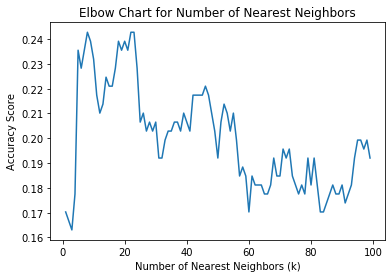

In [68]:
# Develop and display Elbow chart to compare accuracy_score with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='Accuracy Score')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy Score')

plt.title('Elbow Chart for Number of Nearest Neighbors')
ax.legend().set_visible(False)
plt.show()

In [69]:
# Retrain with full dataset.
Property_X = PropertyNorm[['zBeds', 'zBath', 'zPrice']]
Property_y = PropertyNorm['Area']

# Develop k-NN classifier for the entire data set, k = 4.
kNN = KNeighborsClassifier(n_neighbors=3).fit(Property_X, Property_y)

# Display new record's classification result, distances and 
# indices, and nearest neighbors. 
new_record_class = kNN.predict(newPropertyNorm)
print('New Record Classification:', new_record_class)

# Identify and display distances to new record and indices 
# of nearest neighbors. 
distances, indices = kNN.kneighbors(newPropertyNorm)
print()
print('Distances to New Record:',distances)
# print('Indices of Nearest Neighbors:', indices)

# Indetify and display nearest neighbors.
print()
print('Nearest Neighbors to New Record')
print(PropertyNorm.iloc[indices[0], :])

New Record Classification: ['San Mateo' 'San Ramon' 'San Jose' 'Hayward' 'Sunnyvale' 'San Jose'
 'Sunnyvale' 'Hayward' 'Hayward' 'Sunnyvale' 'Sunnyvale' 'Hayward'
 'Hayward' 'Sunnyvale' 'Sunnyvale' 'Hayward' 'Hayward' 'Sunnyvale'
 'Hayward' 'Hayward' 'Sunnyvale' 'Hayward' 'Hayward' 'Hayward' 'Dublin'
 'Hayward' 'Berkeley' 'Berkeley' 'Berkeley' 'San Mateo' 'San Ramon'
 'San Jose' 'Hayward' 'Sunnyvale' 'Sunnyvale' 'Sunnyvale' 'Hayward'
 'Hayward' 'Sunnyvale' 'Sunnyvale' 'Hayward' 'Hayward' 'Sunnyvale'
 'Sunnyvale' 'Hayward' 'Hayward' 'Sunnyvale' 'Hayward' 'Hayward'
 'Sunnyvale' 'Hayward' 'Hayward' 'Hayward' 'Dublin' 'Hayward' 'Dublin'
 'Berkeley' 'Berkeley' 'San Mateo' 'San Ramon' 'San Jose' 'Hayward'
 'Sunnyvale' 'Hayward' 'Sunnyvale' 'Hayward' 'San Jose' 'Hayward'
 'Sunnyvale' 'Hayward' 'San Jose' 'Hayward' 'Sunnyvale' 'Hayward'
 'Hayward' 'Sunnyvale' 'Hayward' 'Hayward' 'Sunnyvale' 'Hayward' 'Hayward'
 'Hayward' 'Dublin' 'Hayward' 'Dublin' 'Berkeley' 'Berkeley' 'San Jose'
 'San Ramon'